# t-Tests

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [2]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [3]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

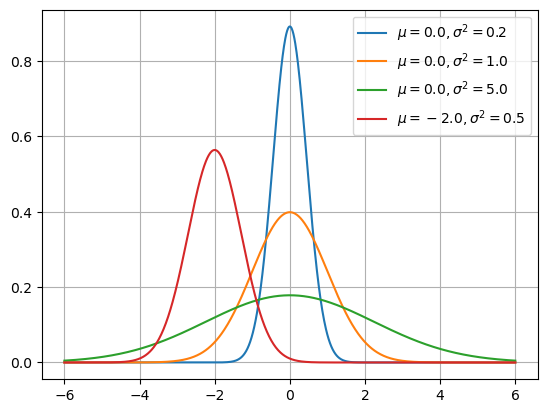

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

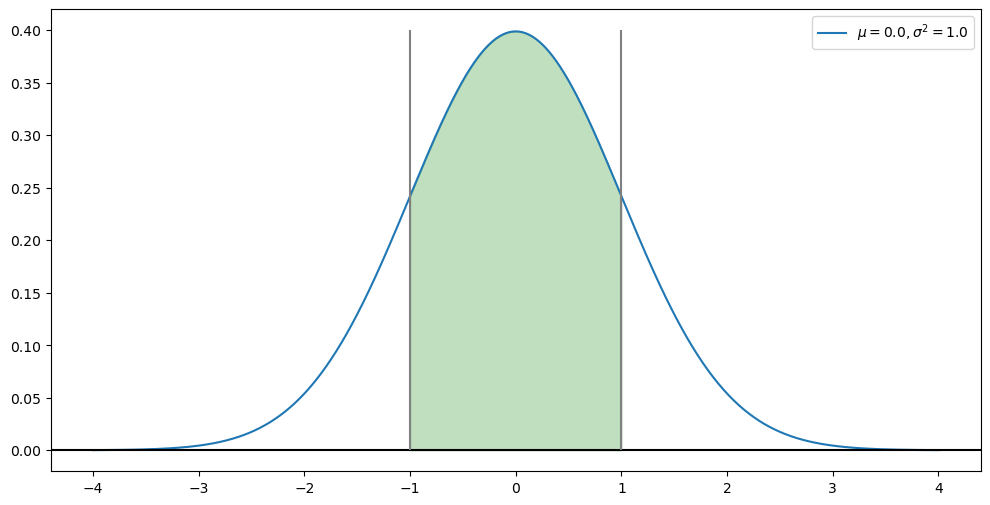

In [7]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values.
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis.
ax.axhline(0.0, color='black')

# Add vertical lines.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)

# Add a legend.
ax.legend();

In [8]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


## Normal Data

***

In [9]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

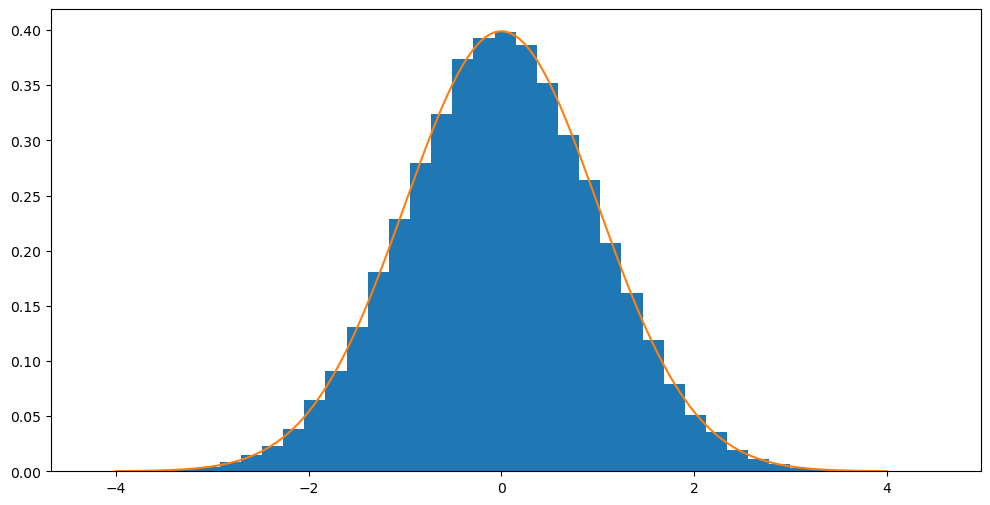

In [10]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [11]:
# Generate some random normal data.
random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[-0.43629289, -0.93998179, -0.82935284, ...,  0.29032231,
         0.09368983, -1.3592695 ],
       [-0.33813021, -0.18809055,  0.65876718, ..., -0.95822041,
        -1.34641339,  0.56081716],
       [-0.52675921, -1.34242507, -0.86316185, ..., -0.34066656,
         0.44895318,  1.21693951],
       ...,
       [ 0.51255923, -0.66152426,  0.13419302, ..., -0.87403461,
        -0.64601858, -0.58552216],
       [-1.01157511,  0.96853461, -0.4375026 , ..., -0.22534641,
         1.88970626, -0.26906391],
       [-0.52495001,  0.75859839, -2.2854103 , ...,  0.42991816,
         0.45029925, -0.69037826]])

In [12]:
# Mean across the rows.
random_data.mean(axis=1)

array([ 0.05278899, -0.50576215,  0.1862307 , ..., -0.06088532,
        0.42005358, -0.32025446])

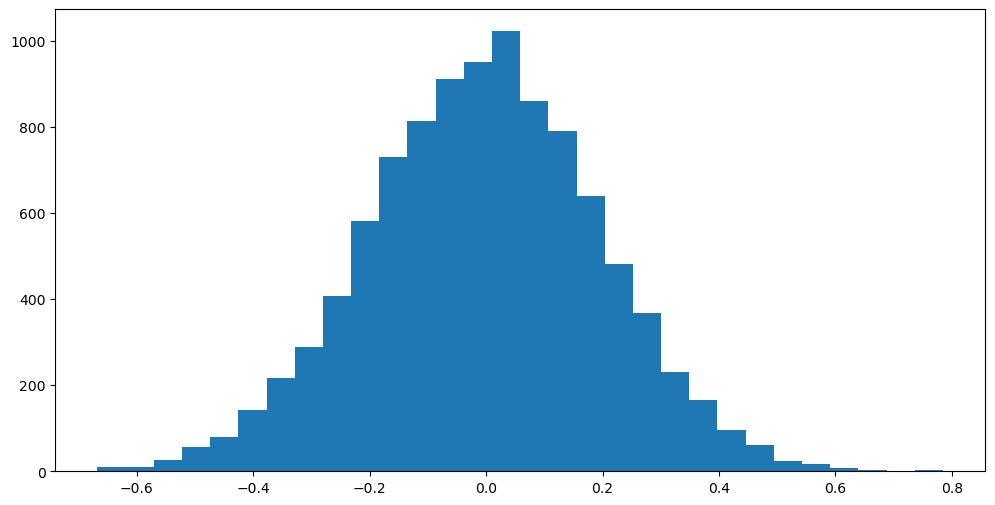

In [13]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

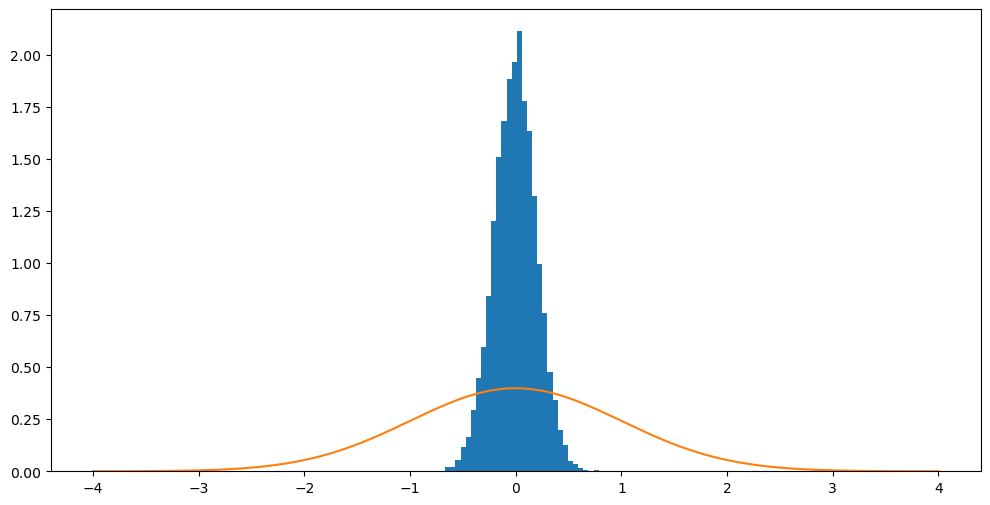

In [14]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

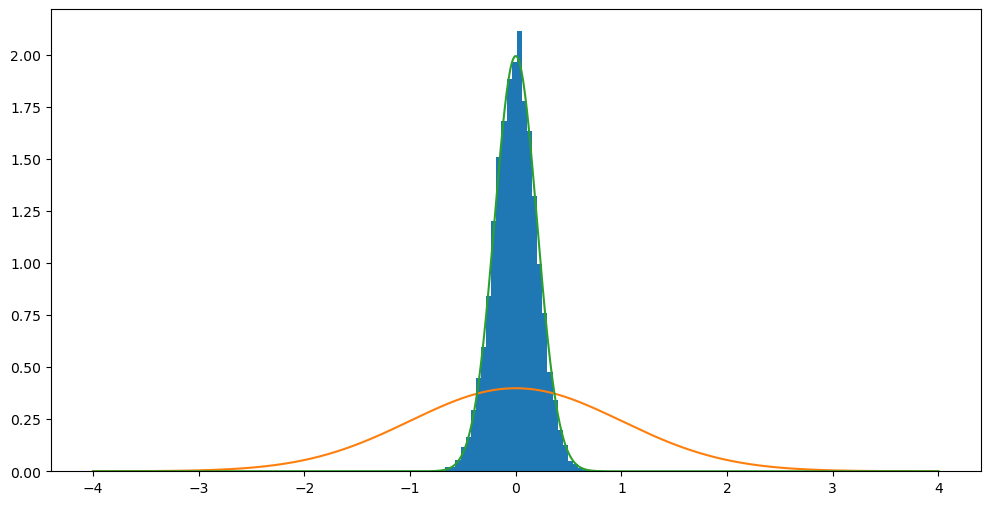

In [15]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [16]:
# Let's pick a random mean value.
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [17]:
# Generate some random normal data with this unknown mu.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-2.27324384, -3.63550352, -3.8933507 , ..., -2.84578291,
        -2.0771762 , -1.863444  ],
       [ 1.12693468, -2.50479367, -1.92963006, ..., -1.78293665,
        -1.57046209, -2.76934143],
       [-0.75017399, -0.47390087, -0.4896749 , ..., -2.81273848,
        -1.62397225, -2.76422591],
       ...,
       [-2.25729904, -1.62044029,  0.39875611, ..., -1.60645291,
        -2.98965914, -1.30178338],
       [-2.13867465, -3.57257691, -1.71896594, ..., -1.45952906,
        -1.78670952, -2.86015088],
       [-1.98919273, -1.12879928, -1.17458429, ..., -0.95133637,
        -2.33159997, -1.53320684]])

(array([0.00998474, 0.01996947, 0.04193589, 0.07987789, 0.13379546,
        0.23563977, 0.42135585, 0.61505973, 0.89662928, 1.15822936,
        1.48772564, 1.75731351, 1.81722193, 1.88112424, 1.96299907,
        1.80723719, 1.55562185, 1.25607977, 1.07635453, 0.71091319,
        0.40338333, 0.31551765, 0.1777283 , 0.04992368, 0.04992368,
        0.02396337, 0.01198168, 0.00599084, 0.00199695, 0.00399389]),
 array([-2.79790314, -2.7478267 , -2.69775026, -2.64767383, -2.59759739,
        -2.54752095, -2.49744451, -2.44736808, -2.39729164, -2.3472152 ,
        -2.29713877, -2.24706233, -2.19698589, -2.14690945, -2.09683302,
        -2.04675658, -1.99668014, -1.9466037 , -1.89652727, -1.84645083,
        -1.79637439, -1.74629795, -1.69622152, -1.64614508, -1.59606864,
        -1.5459922 , -1.49591577, -1.44583933, -1.39576289, -1.34568646,
        -1.29561002]),
 <BarContainer object of 30 artists>)

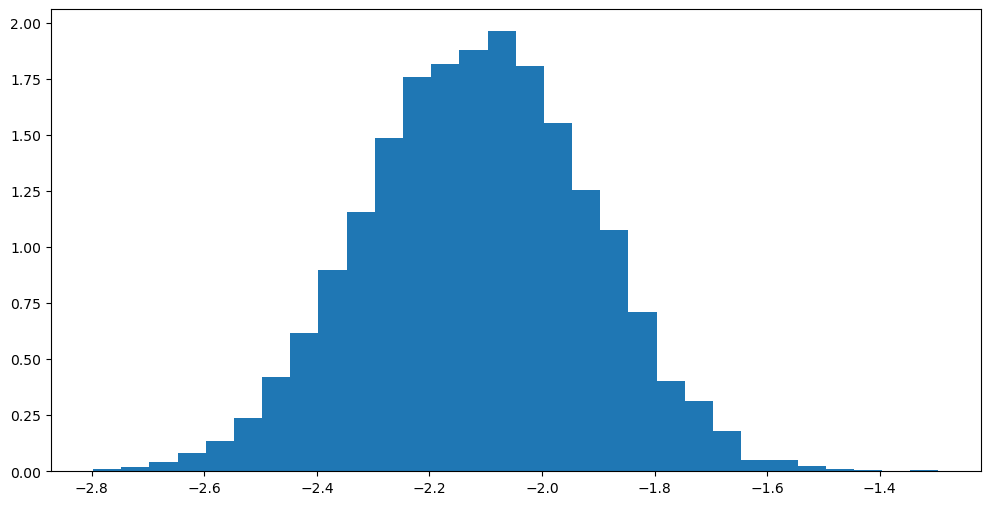

In [18]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [19]:
# Estimate random_mu from above histogram.
# Now look at the value.
random_mu

-2.1102209994013137

In [20]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([-4.26098522, -3.09204052, -3.14152672, -2.60902095, -1.88525179,
        0.25519918, -2.91576838, -1.11582541, -1.85449683, -2.81361523,
       -3.26934783, -2.280779  , -2.67925782, -3.25129211, -2.19885413,
       -2.89712502, -3.12916701, -1.30067632, -1.46505387, -2.50402773,
       -2.33021723, -1.06901766, -2.0765105 , -2.83470577, -2.74754078,
       -1.77428298, -2.38705275, -2.16052136, -3.31218045, -2.9365318 ,
       -3.21804462, -2.12636361, -2.40993892, -1.7718795 , -1.61667964,
       -2.77316657, -0.82548679, -0.61085339, -2.55811231, -2.99319163,
       -2.30043   , -1.27945978, -1.73486408, -1.60093481, -2.8307302 ,
       -0.49582018, -2.35624699, -2.66241706, -1.55181311, -2.9482956 ])

In [21]:
# Calculate the mean of the sample.
sample.mean()

-2.2540440556591297

## Independent Samples t-test

***

In [22]:
# Load Iris.
df = pd.read_csv('data/iris.csv')

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [24]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [25]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End